In [1]:
import matplotlib as mpl
mpl.__version__

'3.5.1'

In [2]:
import pandas as pd
pd.__version__

'1.3.0'

In [3]:
import numpy as np
np.__version__

'1.19.5'

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import matplotlib.gridspec as gridspec
from IPython.display import HTML

In [5]:
albums = pd.read_csv('data/albums.csv')
bands = pd.read_csv('data/bands.csv')
reviews = pd.read_csv('data/reviews.csv')

In [6]:
albums

,id,band,title,year
0,1,1,Taste the Hate,2014
1,2,3,The Bringer of Death,2014
2,3,4,Deception| Calculate What You Can't See,2005
3,4,7,Inti Huacay,1998
4,5,7,Génesis & horror,2002
...,...,...,...,...
28064,28065,37723,White Noise Paranormal,2010
28065,28066,37723,Anomalies of the Forest,2011
28066,28067,37723,Mother Earth Pantheon,2012
28067,28068,37723,Paganwinds,2014


In [7]:
rev = (reviews[['album','score']].set_index('album') *100).astype(np.int64)#
rev

,score
album,
4,88
5,96
8,83
45,80
54,92
...,...
28061,89
28065,80
28065,80


In [8]:
a = []
for i in rev.index.unique():
    if len(rev.loc[i]) > 1:
        a.append(round(rev.loc[i].mean()['score']))
    else:
        a.append(round(rev.loc[i].mean()))
a[0:5]

[88, 96, 83, 80, 92]

In [9]:
rev = pd.DataFrame({'album': rev.index.unique(), 'score': a})
rev

,album,score
0,4,88
1,5,96
2,8,83
3,45,80
4,54,92
...,...,...
7900,28058,91
7901,28061,89
7902,28065,80
7903,28066,80


In [10]:
df = albums.merge(bands, 
                  left_on='band', 
                  right_on='id', 
                  suffixes=(None,'_r')).drop(['band', 'id_r'], 
                                             axis=1).merge(rev, 
                                                           left_on='id', 
                                                           right_on='album', 
                                                           suffixes=(None,None), 
                                                           how ='left').drop('album', 
                                                                             axis=1).set_index('id').convert_dtypes()
df

,title,year,name,country,status,formed_in,genre,theme,active,score
id,,,,,,,,,,
1,Taste the Hate,2014,('M') Inc.,United States,Unknown,2009,Death Metal,<NA>,2009-?,<NA>
2,The Bringer of Death,2014,.F.O.A.D.,France,Active,2009,Death Metal,Life and Death,2009-present,<NA>
3,Deception| Calculate What You Can't See,2005,100 Suns,United States,Active,2004,Death Metal,<NA>,2004-present,<NA>
4,Inti Huacay,1998,1917,Argentina,Active,1994,Death Metal,Dark Philosophical Poetry| Art| Religion| Psyc...,1994-present,88
5,Génesis & horror,2002,1917,Argentina,Active,1994,Death Metal,Dark Philosophical Poetry| Art| Religion| Psyc...,1994-present,96
...,...,...,...,...,...,...,...,...,...,...
28065,White Noise Paranormal,2010,Frozen Mist,United States,Active,2004,Gothic Metal (2004-2006)| Melodic Death/Gothic...,Darkness| Despair| Death| Horror| Pagan Ancestry,2004-2014| 2014-2016| 2016-present,80
28066,Anomalies of the Forest,2011,Frozen Mist,United States,Active,2004,Gothic Metal (2004-2006)| Melodic Death/Gothic...,Darkness| Despair| Death| Horror| Pagan Ancestry,2004-2014| 2014-2016| 2016-present,80
28067,Mother Earth Pantheon,2012,Frozen Mist,United States,Active,2004,Gothic Metal (2004-2006)| Melodic Death/Gothic...,Darkness| Despair| Death| Horror| Pagan Ancestry,2004-2014| 2014-2016| 2016-present,70


In [11]:
def convert(list_):
    temp = []
    for i in list_:
        temp.extend(i)
    return temp

def remove_all(list_, value):
    while list_.count(value):
        list_.remove(value)
    return list_

def years(y):
    y = y.split('|')
    for i in range(len(y)):
        w = y[i].split('-', 1)
        for k in range(len(w)):
            if w[k].find('(') != -1 or w[k].find(')') != -1 or w[k].find('?') != -1: #ignoring changed name bands
                w[k] = None
            elif w[k].find('present') != -1:
                w[k] = 2017
            else:
                w[k] = int(w[k])
        w = remove_all(w, None)
        if len(w) == 0:
            y[i] = []
        elif len(w) == 1:
            y[i] = w
        elif len(w) == 2:
            y[i] = list(range(w[0], w[1] + 1))
       
    y = convert(y)
    return y

df['active'] = df['active'].fillna('?').apply(years)
df['active']

id
1                                                   [2009]
2        [2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...
3        [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
4        [1994, 1995, 1996, 1997, 1998, 1999, 2000, 200...
5        [1994, 1995, 1996, 1997, 1998, 1999, 2000, 200...
                               ...                        
28065    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
28066    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
28067    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
28068    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
28069    [2004, 2005, 2006, 2007, 2008, 2009, 2010, 201...
Name: active, Length: 28069, dtype: object

In [12]:
countrys = df['country'].unique()
len_ = len(countrys) + 1
colors = {}
for i in range(len_):
    if i == len_ - 1:
        colors['Other'] = (0.6, 0.4, 0.8, 1.)
    else:
        colors[countrys[i]] = plt.cm.Spectral((i+1)/float(len_ - 1))
colors

{'United States': (0.6365244136870435,
  0.022683583237216455,
  0.26282199154171476,
  1.0),
 'France': (0.6534409842368321, 0.04144559784698193, 0.2668204536716648, 1.0),
 'Argentina': (0.6703575547866205,
  0.0602076124567474,
  0.27081891580161477,
  1.0),
 'Spain': (0.6872741253364091, 0.07896962706651288, 0.2748173779315648, 1.0),
 'Sweden': (0.7041906958861976, 0.09773164167627835, 0.27881584006151483, 1.0),
 'Australia': (0.7211072664359862,
  0.11649365628604381,
  0.28281430219146486,
  1.0),
 'Mexico': (0.7380238369857748, 0.1352556708958093, 0.28681276432141484, 1.0),
 'Italy': (0.7549404075355632, 0.15401768550557476, 0.29081122645136487, 1.0),
 'Germany': (0.7718569780853518, 0.17277970011534027, 0.2948096885813149, 1.0),
 'Bulgaria': (0.7887735486351404,
  0.19154171472510573,
  0.29880815071126493,
  1.0),
 'Chile': (0.8056901191849289, 0.21030372933487118, 0.3028066128412149, 1.0),
 'Czech Republic': (0.8226066897347175,
  0.22906574394463664,
  0.30680507497116494,
  

In [13]:
contains = np.vectorize(lambda a, b: a.__contains__(b))

#df['country'][df['name'][contains(df['active'], 2017)].drop_duplicates().index].value_counts().sum()

df['country'][df[df['formed_in'] == 2016]['name'].drop_duplicates().index].value_counts()

United States    5
International    3
Canada           2
Mexico           2
Australia        1
Serbia           1
New Zealand      1
Belgium          1
Germany          1
Sweden           1
Russia           1
Brazil           1
Finland          1
Spain            1
Name: country, dtype: Int64

In [14]:
contains = np.vectorize(lambda a, b: a.__contains__(b))

df['country'][contains(df['active'], 2017)].value_counts().sum()

20241

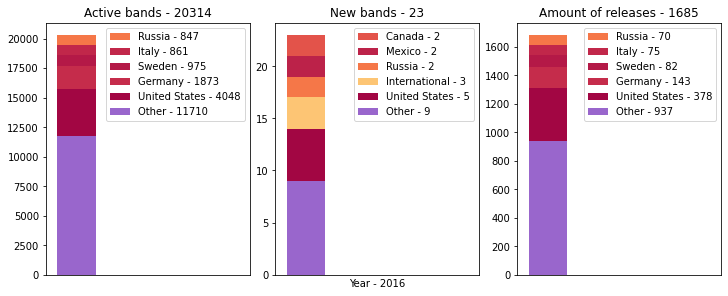

In [15]:
fig = plt.figure(figsize=(10, 4), constrained_layout=True)

class Animation():
  def __init__(self, fig, df):
    self.fig = fig 
    self.df = df
    
    #self.gs0 = gridspec.GridSpec(2, 1, figure=fig)
    
    self.gs1 = gridspec.GridSpec(1, 3, figure=fig)
    
    self.active = fig.add_subplot(self.gs1[0])
    self.new = fig.add_subplot(self.gs1[1])
    self.release = fig.add_subplot(self.gs1[2])
    
    #self.all = fig.add_subplot(self.gs0[1])

  def update(self, year):
    #print(year)
    self.active.clear()
    self.new.clear()
    self.release.clear()
    #self.all.clear()
    
    plt.title(f'Year - {year}')
    
    self.new.set_xlabel(f'Year - {year}')
    
    #active block start
    country = df['country'][contains(df['active'], year)].value_counts()
    country['Other'] = country[5:].sum()
    country=country.sort_values()[::-1][:6]
    sum_ = country.sum()
    if sum_:
        for l, v in country[::-1].items():
            self.active.bar(-4, sum_, label=f'{l} - {v}', width=1, color = colors[l])
            sum_ -= v
        self.active.set_xticks([])
        self.active.set_xlim(-4.8, 0.5)
        self.active.legend()
        self.active.set_title(f'Active bands - {country.sum()}')
    else:
        self.active.set_yticks([])
        self.active.set_xticks([])
        self.active.set_title(f'No active bands')
    #active block end
    
    #new block start
    country = df[df['formed_in'] == year]['country'].value_counts()
    country['Other'] = country[5:].sum()
    country=country.sort_values()[::-1][:6]
    sum_ = country.sum()
    if sum_:
        for l, v in country[::-1].items():
            self.new.bar(-4, sum_, label=f'{l} - {v}', width=1, color = colors[l])
            sum_ -= v
        self.new.set_xticks([])
        self.new.set_xlim(-4.8, 0.5)
        self.new.legend()
        self.new.set_title(f'New bands - {country.sum()}')
    else:
        self.new.set_yticks([])
        self.new.set_xticks([])
        self.new.set_title(f'No new bands')
    #new block end
    
    #release block start
    country = df[df['year'] == year]['country'].value_counts()
    country['Other'] = country[5:].sum()
    country=country.sort_values()[::-1][:6]
    
    sum_ = country.sum()
    if sum_:
        for l, v in country[::-1].items():
            self.release.bar(-4, sum_, label=f'{l} - {v}', width=1, color = colors[l])
            sum_ -= v
    
        self.release.set_xticks([])
        self.release.set_xlim(-4.8, 0.5)
        self.release.legend()
        self.release.set_title(f'Amount of releases - {country.sum()}')
    else:
        self.release.set_yticks([])
        self.release.set_xticks([])
        self.release.set_title(f'No releases')
    #release block end
    
    return self.fig

obj = Animation(fig, df)
anim = ani.FuncAnimation(fig, obj.update,
                         frames = range(1978, 2017),
                         repeat = False,
                         interval=500)


HTML(anim.to_html5_video())

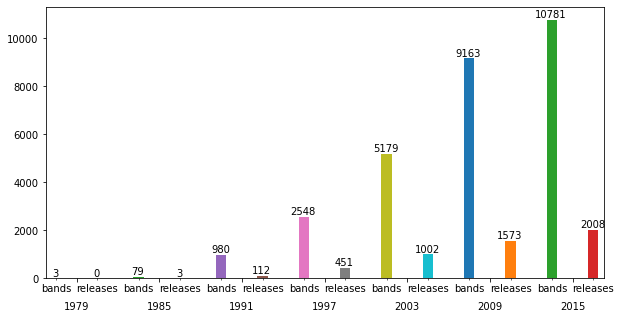

In [16]:
def numbs(n):
    return len(str(n))

fig = plt.figure(figsize=(10, 5))
all_ = fig.add_subplot(111)
years = [1979, 1985, 1991, 1997, 2003, 2009, 2015]
len_ = len(years)
all_.set_xlim(0, -2 + len_*8)
all_.set_xticks([1+i*4 for i in range(len_*2)], labels=['bands', 'releases']*len_, minor=True)
all_.set_xticks([3+i*8 for i in range(len_)], labels=[str(i) for i in years], y=-0.06)


for year, i in zip(years, range(len_)):
    country_b = df['country'][df['name'][contains(df['active'], year)].drop_duplicates().index].value_counts().sum()
    all_.bar(1+(i*8), country_b, width=1.0)
    plt.text(((3 - numbs(country_b))*0.3) + (i*8), country_b + 100, f'{country_b}')
    
    country_r = df[df['year'] == year]['country'].value_counts().sum()
    all_.bar(5+(i*8), country_r, width=1.0)
    plt.text(((3 - numbs(country_r))*0.3) + (i*8) + 4, country_r + 100, f'{country_r}')
    

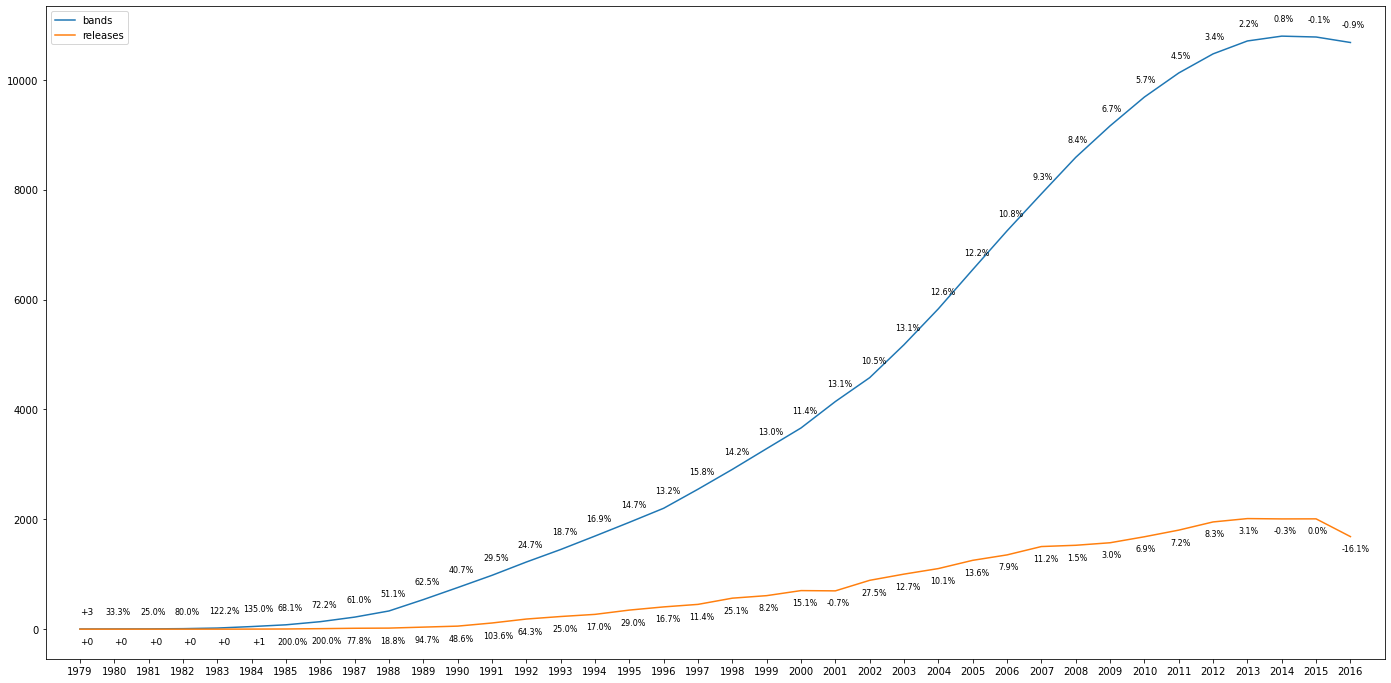

In [17]:
fig = plt.figure(figsize=(24,12))
all_ = fig.add_subplot(111)
countrys = []
years = range(1979, 2017)

all_.set_xticks(years)
all_.set_xlim(1978, 2017)
for year in years:
    countrys.append(df['country'][df['name'][contains(df['active'], year)].drop_duplicates().index].value_counts().sum())
    countrys.append(df[df['year'] == year]['country'].value_counts().sum())

for i in range(len(countrys)):
    if i % 2:
        if i == 1 or countrys[i - 2] == 0:
            plt.text(years[i // 2], countrys[i] - 270, f'+{countrys[i]}', fontsize=9)
        else:
            plt.text(years[i // 2] - 0.25, countrys[i] - 270, f'{round((countrys[i] - countrys[i-2]) / countrys[i-2] * 100, 1)}%', fontsize=8)
    else:
        if i == 0 or countrys[i - 2] == 0:
            plt.text(years[i // 2], countrys[i] + 270, f'+{countrys[i]}', fontsize=9)
        else:
            plt.text(years[i // 2] - 0.25, countrys[i] + 270, f'{round((countrys[i] - countrys[i-2]) / countrys[i-2] * 100, 1)}%', fontsize=8)
    
all_.plot(years, countrys[::2], label='bands')
all_.plot(years, countrys[1::2], label='releases')
all_.legend()

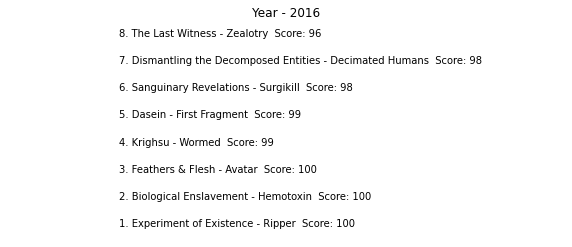

In [18]:
fig = plt.figure(figsize=(10, 4))
  

class Animation():
  def __init__(self, fig, df):
    self.fig = fig 
    self.df = df
    
    
    self.ax = fig.add_subplot()
  def update(self, year):
    self.ax.clear()
    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["bottom"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)    
    plt.gca().spines["left"].set_visible(False)
    self.ax.set_xticks([])
    self.ax.set_yticks([])
    self.ax.set_title(f"Year - {year}")
    self.ax.set_ylim(-0.5, 7.5)
    eight = df[df['year'] == year].sort_values('score').dropna()[::-1][0:8]
    for i, iter_ in zip(eight.iterrows(), range(len(eight))):
        self.ax.text(0.2, iter_, f"{iter_ + 1}. {i[1]['title']} - {i[1]['name']}  Score: {i[1]['score']}")
    return self.fig

obj = Animation(fig, df)
anim = ani.FuncAnimation(fig, obj.update,
                         frames = range(1984, 2017),
                         repeat = False,
                         interval=500)


HTML(anim.to_html5_video())